<a href="https://colab.research.google.com/github/anatorres09/DE-MRI_Classificacio_CNN/blob/main/Visualitzaci%C3%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
# Clonar el repositori del GitHUb que conté les imatges
!git clone https://github.com/anatorres09/DE-MRI_Classificacio_CNN.git
! ls

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Cloning into 'DE-MRI_Classificacio_CNN'...
remote: Enumerating objects: 1046, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 1046 (delta 80), reused 181 (delta 79), pack-reused 862
Receiving objects: 100% (1046/1046), 177.41 MiB | 9.97 MiB/s, done.
Resolving deltas: 100% (125/125), done.
Updating files: 100% (155/155), done.
DE-MRI_Classificacio_CNN  sample_data


In [2]:
# Connectar a Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import nibabel as nib
import matplotlib.pyplot as plt

In [4]:
# Directoris
data_path = '/content/DE-MRI_Classificacio_CNN/dataset' 
drive_folder = '/content/drive/MyDrive/CNN'

In [24]:
# Rutes de les carpetes amb les imatges 3D
ruta_Im3D_normal = os.path.join(data_path, "entrenament", "normal")
ruta_Im3D_patologic = os.path.join(data_path, "entrenament", "patologic")
ruta_Im3D_test = os.path.join(data_path, "test")


# Rutes de les carpetes amb les imatges 2D
ruta_Im2D_normal = os.path.join(drive_folder, "corr_entrenament", "corr_normal")
ruta_Im2D_patologic = os.path.join(drive_folder, "corr_entrenament", "corr_patologic")
ruta_Im2D_test = os.path.join(drive_folder, "test")

Archivos disponibles:
     1.normal
     2.patologic
     3.test
Ingrese el número de la carpeta que desea visualizar: 2
Archivos disponibles:
1. Case_P080.nii
2. Case_P078.nii
3. Case_P061.nii
4. Case_P031.nii
5. Case_P002.nii
6. Case_P015.nii
7. Case_P039.nii
8. Case_P050.nii
9. Case_P008.nii
10. Case_P094.nii
11. Case_P019.nii
12. Case_P087.nii
13. Case_P021.nii
14. Case_P022.nii
15. Case_P051.nii
16. Case_P072.nii
17. Case_P036.nii
18. Case_P053.nii
19. Case_P035.nii
20. Case_P071.nii
21. Case_P044.nii
22. Case_P067.nii
23. Case_P093.nii
24. Case_P073.nii
25. Case_P082.nii
26. Case_P026.nii
27. Case_P007.nii
28. Case_P095.nii
29. Case_P100.nii
30. Case_P005.nii
31. Case_P063.nii
32. Case_P003.nii
33. Case_P011.nii
34. Case_P045.nii
35. Case_P096.nii
36. Case_P099.nii
37. Case_P097.nii
38. Case_P074.nii
39. Case_P055.nii
40. Case_P009.nii
41. Case_P017.nii
42. Case_P057.nii
43. Case_P060.nii
44. Case_P029.nii
45. Case_P069.nii
46. Case_P091.nii
47. Case_P010.nii
48. Case_P090.nii
49

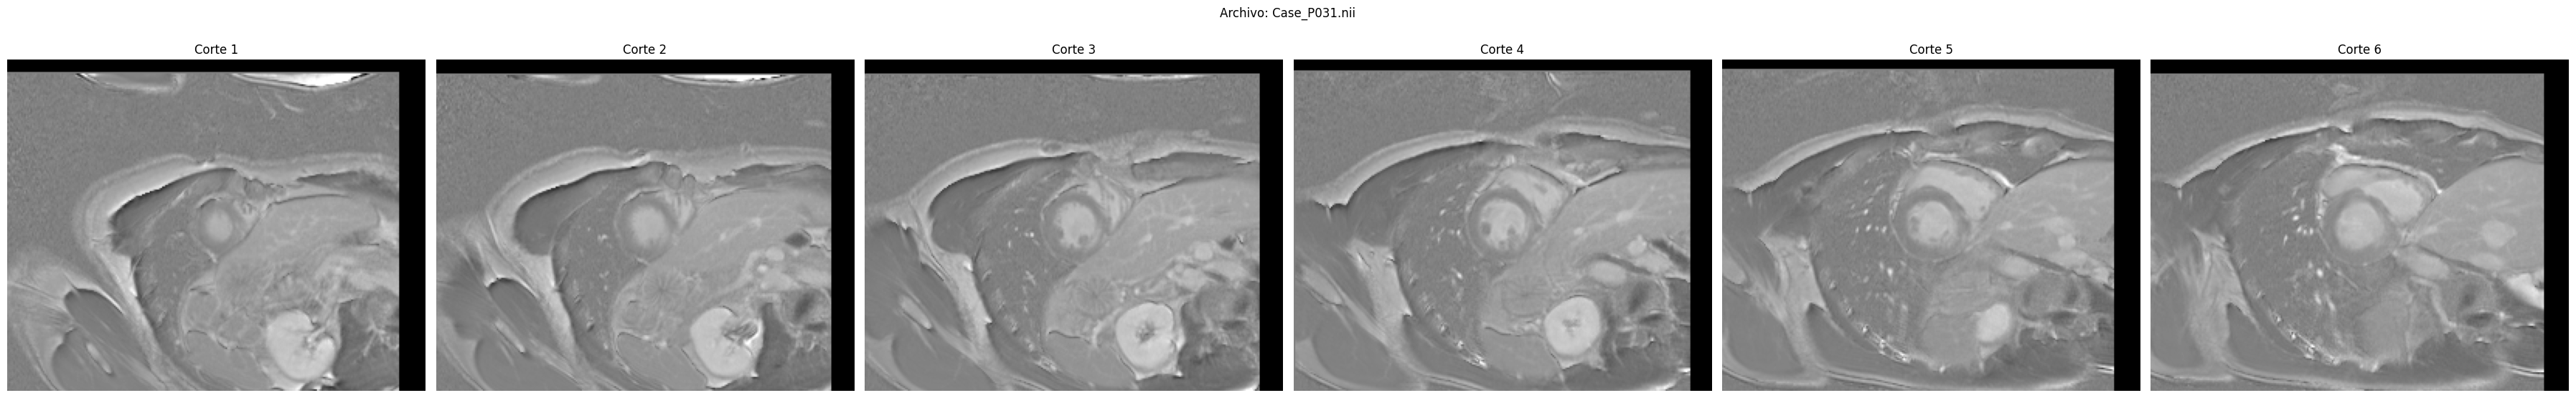

In [30]:
# Mostrar la lista de archivos disponibles
print("Archivos disponibles:")
print("     1.normal")
print("     2.patologic")
print("     3.test")


# Solicitar al usuario que ingrese el número del archivo a visualizar
opcion1 = int(input("Ingrese el número de la carpeta que desea visualizar: ")) - 1

# Verificar si la opción ingresada es válida
if opcion1 == 0:
    ruta_carpeta = ruta_Im3D_normal
    nombre_carpeta = "normal"
elif opcion1 == 1:
    ruta_carpeta = ruta_Im3D_patologic
    nombre_carpeta = "patologic"
elif opcion1 == 2:
    ruta_carpeta = ruta_Im3D_test
    nombre_carpeta = "test"
else:
    print("Opción inválida.")

# Obtener la lista de archivos NIfTI en la carpeta seleccionada
archivos_nifti = [archivo for archivo in os.listdir(ruta_carpeta) if archivo.endswith(".nii")]


# Mostrar la lista de archivos disponibles
print("Archivos disponibles:")
for i, archivo in enumerate(archivos_nifti):
    print(f"{i+1}. {archivo}")

# Solicitar al usuario que ingrese el número del archivo a visualizar
opcion2 = int(input("Ingrese el número del archivo que desea visualizar: ")) - 1

# Verificar si la opción ingresada es válida
if opcion2 < 0 or opcion2 >= len(archivos_nifti):
    print("Opción inválida.")
else:
    # Obtener la ruta completa del archivo seleccionado
    ruta_archivo_nifti = os.path.join(ruta_carpeta, archivos_nifti[opcion2])

    # Cargar el archivo NIfTI
    nifti_img = nib.load(ruta_archivo_nifti)

    # Obtener los datos del volumen
    volumen = nifti_img.get_fdata()

    # Obtener las dimensiones del volumen
    alto, ancho, num_cortes = volumen.shape

    # Crear la figura y los subgráficos
    fig, axes = plt.subplots(1, num_cortes, figsize=(6*num_cortes, 6))

    # Visualizar todos los cortes
    for i in range(num_cortes):
        # Obtener el corte actual
        corte = volumen[:, :, i]

        # Mostrar el corte en el subgráfico correspondiente
        axes[i].imshow(corte, cmap="gray")
        axes[i].axis("off")

        # Establecer el título del subgráfico
        axes[i].set_title(f"Corte {i+1}")

    # Obtener el nombre del archivo sin la ruta
    nombre_archivo = os.path.basename(ruta_archivo_nifti)

    # Establecer el título de la figura
    fig.suptitle(f"Archivo: {nombre_archivo}")

    # Ajustar el espaciado entre subgráficos
    plt.tight_layout()

    # Mostrar la figura
    plt.show()